Podsumowanie teoretyczne:

Stężenie białka Y = f(X), gdzie X jest TF lub represorem

Input function dla TF:
$ f(X) = \beta \frac{X^n}{K^n+X^n} $

Input function dla represora:
$ f(X) = \beta \frac{K^n}{K^n+X^n} $

* K - współczynnik aktywacji/represji
* $\beta$ - maksymalna aktywność promotora
* n-współczynnik Hilla

Symulowany układ:
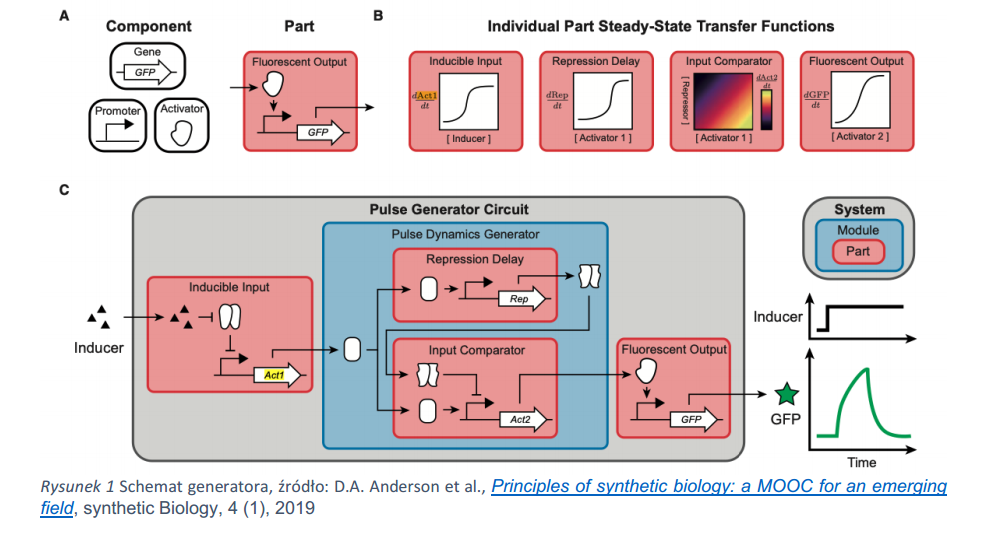

W naszym modelu przyjmujemy, że inducer hamuje inhibicję promotora białka **Act1** do tego stopnia, że produkcja **Act1** zachodzi z największą możliwą prędkością. W ramach naszego modelu definiujemy następujące zmianne:
* $X_{act1}$ - stężenie aktywatora 1
* $X_{act2}$ - stężenie aktywatora 2
* $X_{rep}$ - stężenie represora
* $X_{GFP}$ - stężenie białka GFP
<p>
* $\beta_{act1}$ - maksymalna prędkość syntezy aktywatora 1
* $\beta_{act2}$ - maksymalna prędkość syntezy aktywatora 2
* $\beta_{rep}$ - maksymalna prędkość syntezy represora
* $\beta_{GFP}$ - maksymalna prędkość syntezy GFP
<p>
* $\alpha_{act1}$ - współczynnik degradacji aktywatora 1
* $\alpha_{act2}$ - współczynnik degradacji aktywatora 2
* $\alpha_{rep}$ - współczynnik degradacji represora
* $\alpha_{GFP}$ - współczynnik degradacji GFP
<p>
* $K_{rep-act1}$ - współczynnik aktywacji represora przez aktywator 1
* $K_{act2-act1}$ - współczynnik aktywacji aktywatora 2 przez aktywator 1
* $K_{act2-rep}$ - współczynnik represji aktywatora 2 przez represor
* $K_{GFP-act2}$ - współczynnik aktywacji GFP przez aktywator 2


### Układ równań:
n - współczynnik Hilla, w każdym z równań możemy przyjąć inny
<p>
* Tempo produkcji aktywatora 1. Zakładamy maksymalną szybkość produkcji:
$$
X_{act1}'(t) = \beta_{act1} - \alpha_{act1}X_{act1}(t)
$$
<br>
* Tempo produkcji represora:
$$ 
X_{rep}'(t) = \beta_{rep} \frac{X_{act1}^n(t)}{K_{act1}^n+X_{act_1}^n(t)}\\
$$
<br>
* Tempo produkcji aktywatora 2 - jest zależne od aktywacji poprzez aktywator 1 oraz represji przez represor
<p>
$$
X_{act2}'(t) = \beta_{act2} \frac{X_{act1}^n(t)}{K_{act1}^n+X_{act_1}^n(t)} \frac{K_{rep}^n}{K_{rep}^n+X_{rep}^n(t)} - \alpha_{act2} X_{act2}(t)
$$
<br>
* Tempo produkcji białka GFP
$$
X_{GFP}'(t) = \beta_{GFP} \frac{X_{act_2}^n(t)}{K_{act_2}^n+X_{act_2}^n(t)}\\
$$

### Warunkti brzegowe:
* $ X_{act_1}(0) = 0 $
* $ X_{rep}(0) = 0 $
* $ X_{act_2}(0) = 0 $
* $ X_{GFP}(0) = 0 $

### Rozwiązanie układu równań

* Dobraliśmy stosunkowo małe $ \beta_{act1} $, by ilość białka Act1, produkowanego w sposób konstytucyjny, nie zdominowała wykresu
* By zwiększyć ostrość przejść, przyjęliśmy kooperatywne wiązanie represora do promotora Act2, przy czym sam represor produkowany jest na tyle wolno, że daje możliość, by na początku przeważała produkcja Act2, po czym ostro tłumi ekspresję Act2
* Podobnie, by zwiększyć ostrość piku białka GFP, zdecydowaliśmy, że aktywacja promotora odbywa się w sposób kooperacyjny, w ten sposób, możemy zaobserwować ostry skok stężenia białka, gdy aktywność Act2 nie jest jeszcze mocno represowana

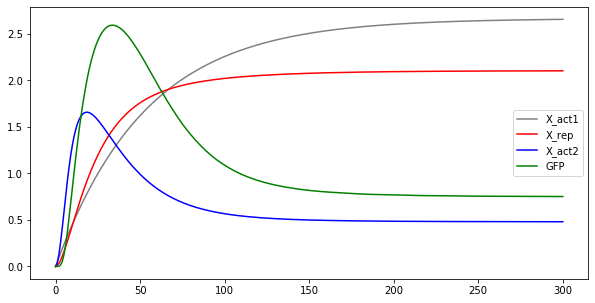

In [170]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

a_act1 = 0.01875
b_act1 = 0.05

a_rep = 0.08
b_rep = 0.2

a_act2 = 0.05
b_act2 = 0.5

a_GFP = 0.1
b_GFP = 0.4

K_rep_act1 = 0.5
K_act2_act1 = 0.3
K_act2_rep = 0.5
K_GFP_act2 = 1

def model (t, y):
    X_act1 = y[0]
    X_rep = y[1]
    X_act2 = y[2]
    X_GFP = y[3]
    
    dX_act1_dt = b_act1 - a_act1 * X_act1
    dX_rep_dt = b_rep * X_act1 / (K_rep_act1 + X_act1) - a_rep * X_rep
    dX_act2_dt = b_act2 * (X_act1 / (K_act2_act1 + X_act1)) * (K_act2_rep**2/ (K_act2_rep**2 + X_rep**2)) - a_act2 * X_act2
    dX_GFP_dt = b_GFP * X_act2**2 / (K_GFP_act2**2 + X_act2**2) - a_GFP * X_GFP

    return [dX_act1_dt,
            dX_rep_dt,
            dX_act2_dt,
            dX_GFP_dt]

time = 300
solver = solve_ivp(model, [0, time], [0, 0, 0, 0], t_eval=np.linspace(0, time, time+1))

t = solver.t

X_act1, X_rep, X_act2, X_GFP = solver.y

# print(X_act2)
#print(t)

plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(t, X_act1, 'k-', label='X_act1', color='gray')
ax.plot(t, X_rep, 'k-', label='X_rep', color='red')
ax.plot(t, X_act2, 'k-', label='X_act2', color='blue')
ax.plot(t, X_GFP, 'k-', label='GFP', color='green')
ax.legend(loc='best')